In [ ]:
# Install: pip install git+https://github.com/seokhyung-lee/color-code-stim.git@sdqc

In [1]:
from color_code_stim import ColorCode, NoiseModel
%load_ext autoreload
%autoreload 2

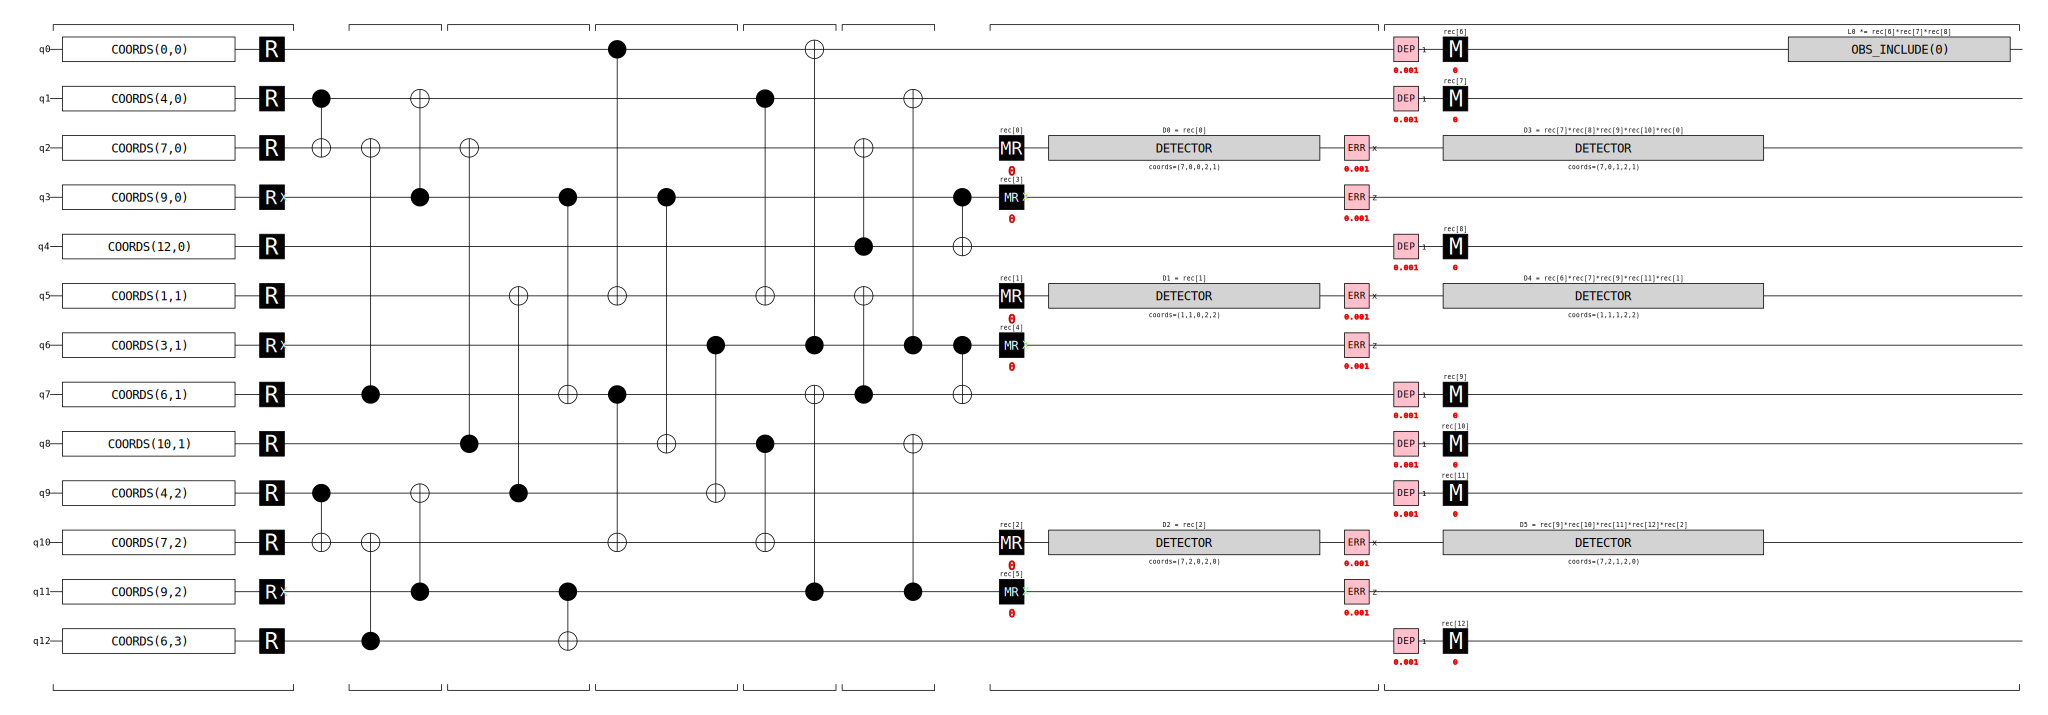

In [4]:
noise = NoiseModel(
    reset=1e-3,
    meas=1e-3,
    initial_data_qubit_depol=1e-3,
    cnot=1e-3,
    depol1_after_cnot=1e-3,
    idle_during_cnot=1e-3,
    idle_during_meas=1e-3,
)

cc = ColorCode(
    d=3,
    rounds=1,
    circuit_type="tri",
    noise_model=noise,
    perfect_logical_initialization=True,
    perfect_logical_measurement=True,
    perfect_first_syndrome_extraction=True,
)

cc.circuit.diagram("timeline-svg")

UnboundLocalError: cannot access local variable 'g' where it is not associated with a value

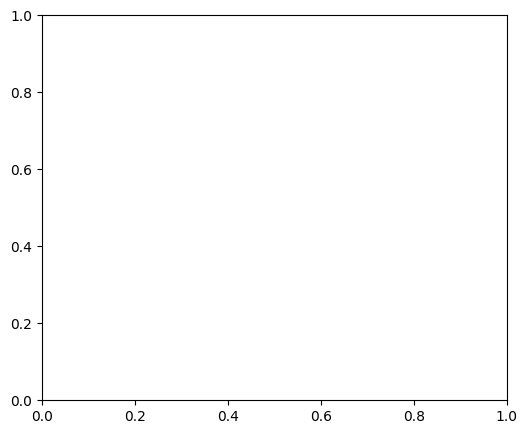

In [7]:
cc.draw_tanner_graph(show_axes=True)